In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [2]:
airbnb = pd.read_csv('data/cleaned/airbnb_staged1.csv')

In [3]:
airbnb.shape

(20724, 22)

In [4]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,30.0,3.0,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,30.0,9.0,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,2.0,6.0,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,30.0,156.0,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,30.0,11.0,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [5]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

In [6]:
airbnb.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

#### Converting ratings from object datatype to float

In [7]:
airbnb.rating.unique()

# Rating is in string datatype 

array(['5', '4.67', '4.17', '4.64', '4.91', '4.33', '4.5', '4.79',
       'No rating', '4.71', '3.2', '4.8', '4.65', '4.75', '4.89', '4.43',
       '4.82', '4.69', '4.11', '4.9', '4.74', '4.87', '3.67', '4.94',
       '4.66', '4.58', '4.95', '4.78', '4.83', '4.73', '4.53', '4.15',
       '4.45', '4.46', '4.86', '4.42', '4.81', '3.84', '4.27', '4.21',
       '4.93', '4.61', '4.77', '4.4', '4.76', '4.7', '4.6', '4.96',
       '4.56', '3.6', '3', '3.82', '4.92', '4.85', '4', '4.97', '4.63',
       '4.38', '4.72', '4.25', '4.68', '4.99', '4.2', '4.54', '4.88',
       '4.59', '4.57', '4.18', '4.62', 'New ', '4.98', '3.33', '4.29',
       '3.4', '4.44', '4.36', '3.75', '4.22', '4.55', '4.26', '3.92',
       '4.3', '4.12', '4.06', '4.51', '2.33', '4.84', '4.47', '4.39',
       '4.41', '4.35', '3.88', '3.86', '4.07', '4.52', '4.49', '4.23',
       '4.31', '4.13', '3.5', '3.8', '4.32', '3.79', '4.19', '4.16',
       '2.83', '4.48', '3.71', '3.36', '4.14', '3.25', '3.89', '4.1',
       '4.09', '

In [8]:
# Changing rating to numerical value

airbnb['rating'] = pd.to_numeric(airbnb['rating'], errors = 'coerce')

In [9]:
airbnb['studio'] = airbnb.bedrooms == 'Studio'
airbnb.studio.sum()

# Flagging 'Studio' listings to make analysis easier

np.int64(1812)

#### Flagging studio stays 

In [10]:
airbnb['studio'] = airbnb['bedrooms'] == 'Studio'

In [11]:
print(airbnb.bedrooms.unique())

#Studios will be seen as 0.5 in the bedrooms columns
airbnb['bedrooms'] = airbnb['bedrooms'].replace('Studio', 0.5)

print("After replacing")
print(airbnb.bedrooms.unique())


['1' '2' 'Studio' '3' '6' '5' '4' '7' '15' '9' '8' '14']
After replacing
['1' '2' 0.5 '3' '6' '5' '4' '7' '15' '9' '8' '14']


In [12]:
airbnb['bedrooms'] = pd.to_numeric(airbnb['bedrooms'], errors = 'coerce')

#### Adding price per bedrooms

In [13]:
#New feature: adding price per bedrooms

airbnb['price_per_bedrooms'] = airbnb.price / airbnb.bedrooms.where(airbnb['studio'] == False, other = 1) 

# if the listing is a studio then price_per_bedrooms stays the same. otherwise its calculated depending on the number of bedrooms

## Handling Outliers

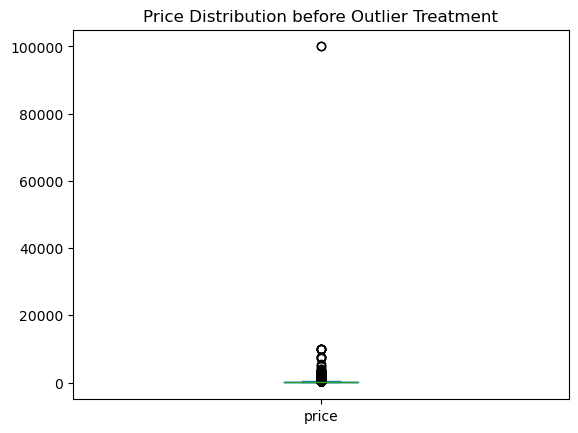

In [14]:
airbnb.price.plot(kind = 'box')
plt.title('Price Distribution before Outlier Treatment')
plt.show()
# Big outliers. So we filter them out

In [15]:
airbnb = airbnb[airbnb['price'] < 1500]

# Filtering the data on pricess less than $1500

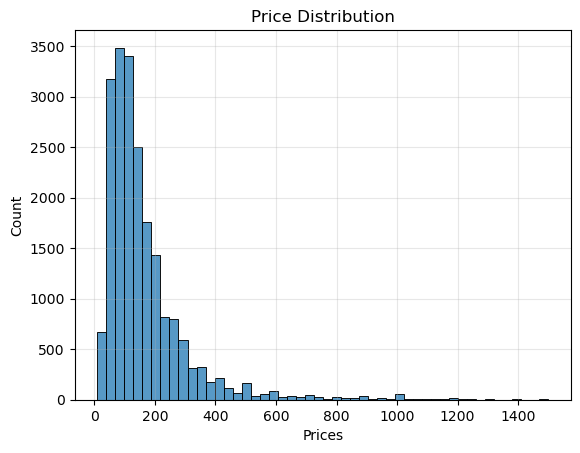

In [16]:
sns.histplot(data=airbnb, x='price', bins = 50)
plt.title('Price Distribution')
plt.xlabel('Prices')
plt.ylabel('Count')
plt.grid(alpha= 0.3)
plt.show()

Text(0.5, 1.0, 'Price Distribution after Outlier Treatment')

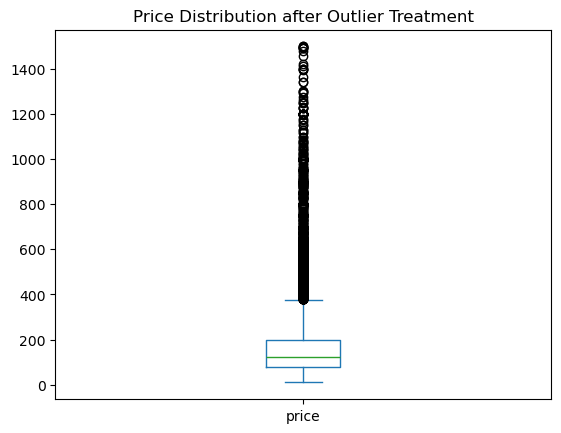

In [17]:
airbnb.price.plot(kind = 'box')
plt.title('Price Distribution after Outlier Treatment')

# So much better

In [18]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,studio,price_per_bedrooms
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,30.0,3.0,20/12/15,0.03,1.0,0.0,0.0,No License,5.00,1.0,1,Not specified,False,55.0
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,30.0,9.0,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2.0,1,1,False,72.0
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,2.0,6.0,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1.0,2,1,False,187.0
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,30.0,156.0,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1.0,1,1,False,120.0
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,30.0,11.0,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,0.5,1,1,True,85.0


In [19]:
airbnb.shape

(20636, 24)

In [20]:
airbnb.to_csv('data/cleaned/airbnb_staged2.csv', index = False)